---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 4

---

Please write your full name here
- **Name** : Mohamed El-Sayed Eid

In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Part 1: SVM

### Use the following function to plot the classification regions

In [2]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.25)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

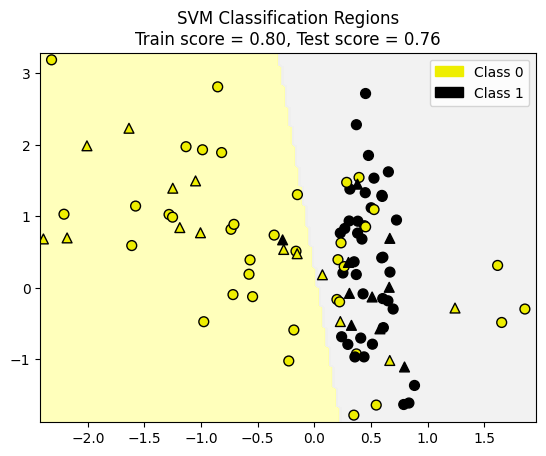

In [5]:
from sklearn.svm import SVC

scv_clf = SVC(kernel='linear')
scv_clf.fit(X_train, y_train)

plot_class_regions_for_classifier(scv_clf, X_train, y_train, X_test, y_test, title='SVM Classification Regions', target_names=['Class 0', 'Class 1'])

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.0001.
2. Train another SVM classifier using linear kernel with C=95
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

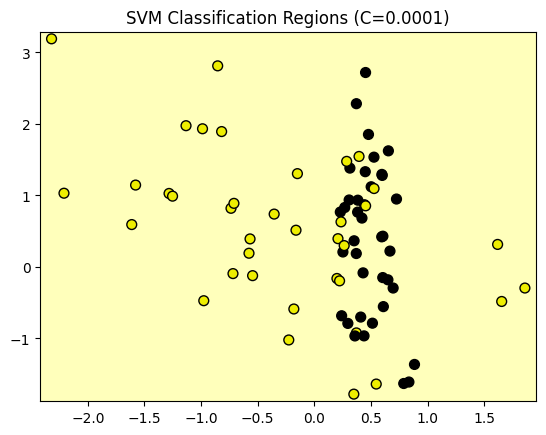

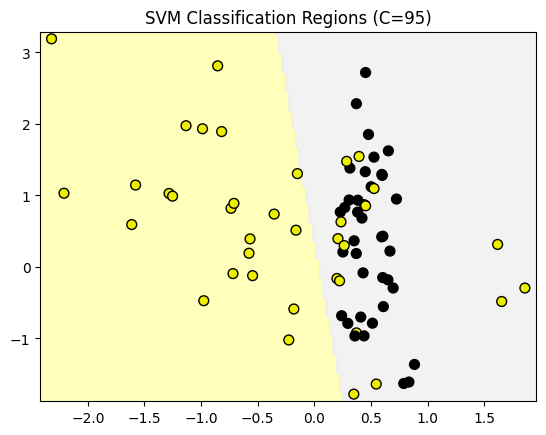

In [6]:
# Train SVM classifier with linear kernel and C=0.0001
clf_0001 = SVC(kernel='linear', C=0.0001)
clf_0001.fit(X_train, y_train)

plot_class_regions_for_classifier(clf_0001, X_train, y_train, title='SVM Classification Regions (C=0.0001)')

# Train SVM classifier with linear kernel and C=95
clf_95 = SVC(kernel='linear', C=95)
clf_95.fit(X_train, y_train)

plot_class_regions_for_classifier(clf_95, X_train, y_train, title='SVM Classification Regions (C=95)')

* SVM classifier using linear kernel with $C$=0.0001: When $C$ is very small, the model gives higher priority to maximizing the margin rather than minimizing the classification error which leads to underfitting.

* SVM classifier using linear kernel with $C$=95: The model will prioritize minimizing the classification error over maximizing the margin.

### Use the fruits dataset in questions 4, 5, 6.

In [7]:
import pandas as pd
fruits = pd.read_table('https://raw.githubusercontent.com/MohamedMandour10/Datasets/main/Mohammed%20AbuMandour%20-%20fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
# fruits.fruit_name.unique()

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [8]:
from sklearn.svm import LinearSVC

# Extracting features and labels
X_fruits = fruits[['height', 'width']]
y_fruits = fruits['fruit_label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0, test_size=0.25)

# Training a Linear SVM
svm_classifier = LinearSVC()
svm_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

#### Question 5
For the previous model from question 4.
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

In [9]:
print("Coefficients:")
print(svm_classifier.coef_)

print("\nIntercepts:")
print(svm_classifier.intercept_)

print("\nNumber of SVM classifiers trained:", len(svm_classifier.classes_))

Coefficients:
[[-2.69705286e-01  4.73956307e-01]
 [-1.10795002e+00  7.89672068e-01]
 [ 5.92654952e-04  1.73022169e-01]
 [ 1.01104771e+00 -1.26179979e+00]]

Intercepts:
[-1.5667588   0.7866807  -1.66569643  0.37278916]

Number of SVM classifiers trained: 4


The number of the SVM models is $4$, as SVM applies one-vs-all classification, This means that it trains a separate binary SVM classifier for each class against all other classes.so the number of models will be $n$ where $n$ is the number of classes.

#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.
(plot it any way you can)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


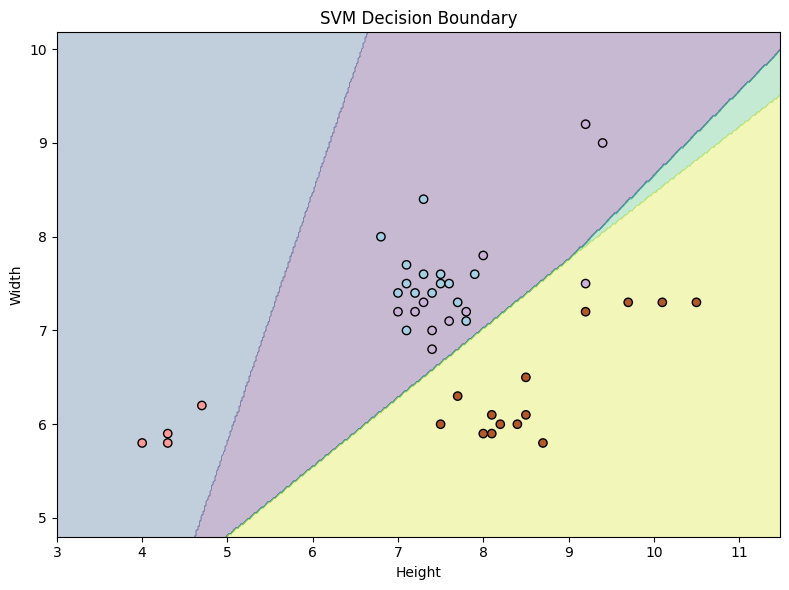

In [10]:
# Define a function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    # Create a meshgrid of points
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point in the meshgrid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Plot the training data
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Height')
    plt.ylabel('Width')
    plt.title(title)

# Plot decision boundaries for each SVM classifier
plt.figure(figsize=(8, 6))
plot_decision_boundary(X_train.values, y_train.values, svm_classifier, 'SVM Decision Boundary')

plt.tight_layout()
plt.show()

 Use the breast cancer dataset in question 7, 8, and9.

In [11]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.001, 0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [12]:
from sklearn.model_selection import GridSearchCV

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.25, random_state=0)

# Define parameters for GridSearchCV
parameters = {'kernel': ('poly', 'rbf'), 'C': [0.001, 0.01, 0.1, 0.5, 1, 10]}

# Initialize SVM classifier
svm_classifier = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_classifier, parameters)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [13]:
from sklearn.metrics import classification_report

# Get the best parameters from the grid search results
best_params = grid_search.best_params_

# Initialize SVM classifier with the best parameters
best_svm_classifier = SVC(kernel=best_params['kernel'], C=best_params['C'])

# Train the SVM classifier on the training data
best_svm_classifier.fit(X_train, y_train)

# Predict labels for training and testing data
y_train_pred = best_svm_classifier.predict(X_train)
y_test_pred = best_svm_classifier.predict(X_test)

print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       159
           1       0.90      0.98      0.94       267

    accuracy                           0.92       426
   macro avg       0.93      0.89      0.91       426
weighted avg       0.92      0.92      0.91       426


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        53
           1       0.94      0.97      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [14]:
from sklearn.preprocessing import StandardScaler

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM classifier on the scaled training data
best_svm_classifier.fit(X_train_scaled, y_train)

# Predict labels for training and testing data
y_train_pred_scaled = best_svm_classifier.predict(X_train_scaled)
y_test_pred_scaled = best_svm_classifier.predict(X_test_scaled)


print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred_scaled))


print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_test_pred_scaled))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       159
           1       0.98      1.00      0.99       267

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.99       426
weighted avg       0.99      0.99      0.99       426


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.99      1.00      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [15]:
# @title
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.ensemble import IsolationForest

# # Preprocessing step 1: Outlier removal
# outlier_removal = IsolationForest(random_state=0)
# inlier_mask_train = outlier_removal.fit_predict(X_train) == 1  # Get mask for inliers
# X_train_no_outliers = X_train[inlier_mask_train]  # Select inliers
# y_train_no_outliers = y_train[inlier_mask_train]  # Corresponding labels

# # Preprocessing step 2: Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_no_outliers)
# X_test_scaled = scaler.transform(X_test)

# # Preprocessing step 3: Feature selection
# feature_selector = SelectKBest(f_classif, k=15)
# X_train_preprocessed = feature_selector.fit_transform(X_train_scaled, y_train_no_outliers)
# X_test_preprocessed = feature_selector.transform(X_test_scaled)

# # Define parameters for GridSearchCV
# parameters = {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 0.5, 1, 10]}

# # Initialize SVM classifier
# svm_classifier = SVC()

# # Initialize GridSearchCV
# grid_search = GridSearchCV(svm_classifier, parameters)

# # Fit GridSearchCV to preprocessed training data
# grid_search.fit(X_train_preprocessed, y_train_no_outliers)

# # Print the best parameters
# print("Best parameters:", grid_search.best_params_)

# # Use the best parameters to train the SVM classifier
# best_svm_classifier = SVC(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'])
# best_svm_classifier.fit(X_train_preprocessed, y_train_no_outliers)

# # Predict labels for training and testing data
# y_train_pred = best_svm_classifier.predict(X_train_preprocessed)
# y_test_pred = best_svm_classifier.predict(X_test_preprocessed)

# # Classification report for training data
# print("Classification Report for Training Data:")
# print(classification_report(y_train_no_outliers, y_train_pred))

# # Classification report for testing data
# print("\nClassification Report for Testing Data:")
# print(classification_report(y_test, y_test_pred))